In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

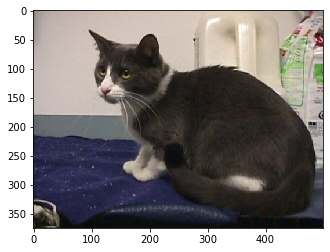

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

In [6]:
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

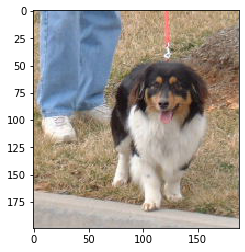

In [7]:
plt.imshow(dog)

In [8]:
dog.shape

(199, 188, 3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen  = ImageDataGenerator(rotation_range = 30,
                                width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               rescale = 1/255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               fill_mode = 'nearest' )

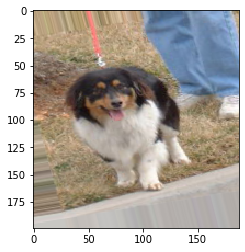

In [12]:
plt.imshow(image_gen.random_transform(dog))

In [13]:
image_gen.flow_from_directory('CATS_DOGS/train',target_size=(150,150))

Found 18743 images belonging to 2 classes.


In [14]:
input_shape = (150,150,3)

In [15]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [16]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3),input_shape = input_shape,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3),input_shape = input_shape,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3),input_shape = input_shape,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128))

model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [18]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                                target_size = input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode = 'binary')

Found 18743 images belonging to 2 classes.


In [19]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                                target_size = input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode = 'binary')

Found 6251 images belonging to 2 classes.


In [20]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [22]:
import warnings
warnings.filterwarnings('ignore')
results = model.fit_generator(train_image_gen,epochs = 10,steps_per_epoch = 100,validation_data = test_image_gen,validation_steps = 12)

Epoch 1/10
100/100 [==============================] - 160s 2s/step - loss: 0.6908 - acc: 0.5444 - val_loss: 0.6535 - val_acc: 0.6042
Epoch 2/10
100/100 [==============================] - 93s 930ms/step - loss: 0.6908 - acc: 0.5300 - val_loss: 0.6893 - val_acc: 0.5052
Epoch 3/10
100/100 [==============================] - 91s 908ms/step - loss: 0.6835 - acc: 0.5806 - val_loss: 0.6835 - val_acc: 0.5365
Epoch 4/10
100/100 [==============================] - 105s 1s/step - loss: 0.6806 - acc: 0.5781 - val_loss: 0.6680 - val_acc: 0.5885
Epoch 5/10
100/100 [==============================] - 81s 815ms/step - loss: 0.6785 - acc: 0.5794 - val_loss: 0.6712 - val_acc: 0.5469
Epoch 6/10
100/100 [==============================] - 87s 867ms/step - loss: 0.6744 - acc: 0.6012 - val_loss: 0.6834 - val_acc: 0.5000
Epoch 7/10
100/100 [==============================] - 70s 703ms/step - loss: 0.6674 - acc: 0.6000 - val_loss: 0.6691 - val_acc: 0.6042
Epoch 8/10
100/100 [==============================] - 69s 6

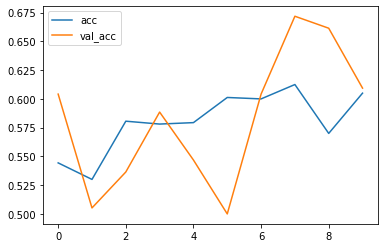

In [27]:
plt.plot(results.history['acc'],label='acc')
plt.plot(results.history['val_acc'],label = 'val_acc')
plt.legend()
plt.show()

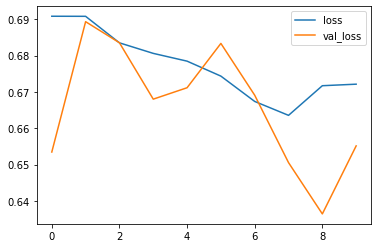

In [28]:
plt.plot(results.history['loss'],label='loss')
plt.plot(results.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

In [29]:
# Loading a trained model 
from keras.models import load_model

In [30]:
new_model = load_model('cat_dog.h5')

In [46]:
dog_file = 'CATS_DOGS/test/DOG/10005.jpg'

In [47]:
from keras.preprocessing  import image

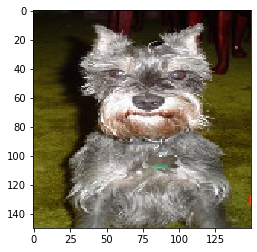

In [54]:
dog_img = image.load_img(dog_file,target_size =(150,150))
plt.imshow(dog_img,cmap = 'gray')

In [49]:
dog_img = image.img_to_array(dog_img)

In [53]:
dog_img.shape

(150, 150, 3)

In [37]:
import numpy as np

In [39]:
dog_img = np.expand_dims(dog_img,axis = 0)

In [40]:
dog_img.shape

(1, 150, 150, 3)

In [41]:
dog_img = dog_img/255

In [42]:
model.predict_classes(dog_img)

array([[1]])

In [43]:
model.predict(dog_img)

array([[0.5803331]], dtype=float32)